# Interpolation

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

In [1]:
#Do not change this cell. It is for setting up things.
%matplotlib inline

## Polynomial interpolation

For given $N$ data points, there is one and only one polynomial which fits these data. Let's assume the given set of data is denoted as $(x_i, y_i)$, $i\in(0,N-1)$. Here the total number of data points is $N$.

One naive way to fit this $N-1$th-order polynomial is to plug in all the data points into the polynomial and solve for the coefficents. The problem is that as $N$ increases, the resulted linear equation system becomes more ill-conditioned and thus is more subject to numerical errors. Therefore, this brutal force approach is seldon used when $N$ is large.

This notebook demonstrates a popular method: Newton's finite divided difference method. In your homework, you will implement the other popular method, i.e., the Lagrange method.  

<!--
In this notebook, two popular alternative methods are introduced: Newton's finite divided difference method and Lagrange method ().
-->

### Newton's finite divided difference method

The method above involves the solution of a linear system. It is a brutal force method because the matrix $\mathbf{A}$ becomes ill-conditioned as the degree of the polynomial increases. An alternative method is the Newton's divided difference method.

The way to derive the Newton's divided difference method is to start with first order (linear) and second-order (quadratic) polynomials and then make a generalization.

* First-order (linear) polynomial
    Two data points are needed to fit a first-order polynomial. Let's note them as ($x_0$, $y_0$) and ($x_1$, $y_1$). Assume the linear interpolant has the form of 
\begin{equation}
f_1(x) = b_0 + b_1(x-x_0)
\end{equation}
The coefficients $b_0$ and $b_1$ are unknown and needed to be solved for. 

Plugging the two given data points, one can get
\begin{eqnarray}
b_0 + b_1(x_0 - x_0) &=& y_0 \\
b_0 + b_1(x_1 - x_1) &=& y_1
\end{eqnarray}
It is easy to solve for the two coefficients:
\begin{eqnarray}
b_0 &=& y_0 \\
b_1 &=& \frac{y_1 - y_0}{x_1 - x_0}
\end{eqnarray}

* Second-order (quadratic) polynomial
    Three data points are needed to fit a second-order polynomial. Let's note them as ($x_0$, $y_0$), ($x_1$, $y_1$), and ($x_2$, $y_2$). Assume the quadratic interpolant has the form of 
\begin{equation}
f_2(x) = b_0 + b_1(x-x_0) + b_2 (x-x_0)(x-x_1)
\end{equation}
The three coefficients $b_0$, $b_1$ and $b_2$ are unknown and needed to be solved for. 

Plugging the three given data points, one can get
\begin{eqnarray}
b_0 + b_1(x_0 - x_0)+ b_2 (x_0-x_0)(x_0-x_1) &=& y_0 \\
b_0 + b_1(x_1 - x_1)+ b_2 (x_1-x_0)(x_1-x_1) &=& y_1 \\
b_0 + b_1(x_2 - x_1)+ b_2 (x_2-x_0)(x_2-x_1) &=& y_2
\end{eqnarray}
It is easy to solve for the three coefficients:
\begin{eqnarray}
b_0 &=& y_0 \\
b_1 &=& \frac{y_1 - y_0}{x_1 - x_0} \\
b_2 &=& \frac{\frac{y_2-y_1}{x_2-x_1} - \frac{y_1-y_0}{x_1-x_0}}{x_2-x_0}
\end{eqnarray}

* The $n$-th order polynomial
    $n+1$ data points are needed to fit a $n$-th order polynomial. Let's note them as ($x_i$, $y_i$), $i$ = 0, 1, 2, ..., n. Notice that the coefficients derived above are approximations of the derivatives, also termed finite divided differences. We note
\begin{equation}
b_0 = f[x_0] = y_0
\end{equation}
\begin{equation}
b_1 = f[x_1, x_0] = \frac{y_1 - y_0}{x_1 - x_0}
\end{equation}
\begin{equation}
b_2 = f[x_2, x_1, x_0] = \frac{\frac{y_2-y_1}{x_2-x_1} - \frac{y_1-y_0}{x_1-x_0}}{x_2-x_0} = \frac{f[x_2,x_1] - f[x_1,x_0]}{x_2-x_0}
\end{equation}

\begin{equation}
\vdots
\end{equation}

\begin{equation}
b_{n-1} = f[x_{n-1}, x_{n-2}, \cdots, x_0]
\end{equation}
\begin{equation}
b_{n} = f[x_{n}, x_{n-1}, \cdots, x_0]
\end{equation}

In fact, the following recursive relation holds
\begin{eqnarray}
b_m &=& f[x_m, x_{m-1}, \cdots, x_0] \\
    &=& \frac{f[x_m, x_{m-1}, \cdots, x_1] - f[x_{m-1}, x_{m-2}, \cdots, x_0]}{x_m - x_0}
\end{eqnarray}

Assume the $n$-th order polynomial interpolant has the form of 
\begin{equation}
f_n(x) = b_0 + b_1(x-x_0) + b_2 (x-x_0)(x-x_1) + ... + b_n (x-x_0)(x-x_1)\cdots(x-x_{n-1})
\end{equation}

\begin{array}{cccccc}
x_0 & y_0 \\
    &     & f[x_1,x_0] \\
x_1 & y_1 &             & f[x_2,x_1,x_0]\\
    &     & f[x_2,x_1]  &              & f[x_3,x_2,x_1,x_0]\\
x_2 & y_2 &             & f[x_3,x_2,x_1] &             & f[x_4,x_3,x_2,x_1,x_0]\\
    &     & f[x_3,x_2]  &              & f[x_4,x_3,x_2,x_1]\\
x_3 & y_3 &             & f[x_4,x_3,x_2]\\
    &     & f[x_4,x_3] \\
x_4 & y_4
\end{array}

The algorithm to calculate the Newton's divided difference coefficients is listed in the following figure and implemented in the code below. 

<img src="Newton_divided.png" width="600">

Value at  7 is  13.47


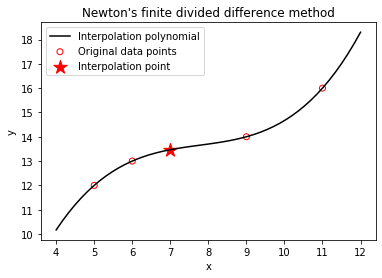

In [18]:
#source: https://www.geeksforgeeks.org/newtons-divided-difference-interpolation-formula/

import numpy as np
import matplotlib.pyplot as plt

# Function to find the product term
def proterm(i, value, x):
    pro = 1.0
    for j in range(i):
        pro = pro * (value - x[j])
        
    return pro

# Function for calculating
# divided difference table
def dividedDiffTable(x, y, n):
    for i in range(1, n):
        for j in range(n - i):
            y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
                        (x[j] - x[i + j]))
    return y

# Function for applying Newton’s
# divided difference formula
def applyFormula(value, x, y, n):
    sum = y[0][0]
    
    for i in range(1, n):
        sum = sum + (proterm(i, value, x) * y[0][i])

    return sum;

# Driver Code

# number of inputs given
n = 4
y = np.zeros([n,n])
x = [ 5, 6, 9, 11 ];

# y[][] is used for divided difference
# table where y[][0] is used for input
y[0][0] = 12
y[1][0] = 13
y[2][0] = 14
y[3][0] = 16

# calculating divided difference table
y=dividedDiffTable(x, y, n)

# value to be interpolated
x_value = 7
y_value = round(applyFormula(x_value, x, y, n), 2)
# printing the value
print("Value at ", x_value, "is ", y_value)

#plot the original data points, fitted polynomial, and the interpolated point
plt.scatter(x,y[:,0], marker = 'o', facecolors='none', edgecolors='r', label='Original data points')  #make a scatter plot with the loaded data
plt.scatter(x_value,y_value, c="r", s=200, marker = '*', label='Interpolation point') 

x_fit = np.linspace(4,12,50)
y_fit = np.zeros(50)
for i in range(50):
    y_fit[i] = applyFormula(x_fit[i], x, y, n)
    
plt.plot(x_fit,y_fit,c='k',label="Interpolation polynomial")    

plt.xlabel('x')
plt.ylabel('y')
plt.title("Newton's finite divided difference method")
plt.legend()
plt.show()


## Overfitting of polynomials

One potential problem of polynomial curve fitting is overfitting. Here is one example due to the German mathematition Carl David Tolmé Runge (who also happen to be the one who invented the Runge-Kutta method for solveing differential equations). Let's sample evenly distributed $N$ points on the function 
\begin{equation}
   f(x) = \frac{1}{1 + x^2}
\end{equation}
in the interval $[-10, +10]$. With these $N$ points, you can fit a polynomial up to the degree of $N-1$. You may think that the more points to sample, i.e., larger $N$, the better the polynomial will fit with the curve of the function $f(x)$. Unfortunately, it is not the case for this function. The following code demonstrate this. By changing the number of data points $N$, you can see how the polynomial fitting behaves. 

Three $N$ values, i.e., 10, 15, and 20 were tried. The resulted corresponding polynomial fitting curves are shown in the following figures. For $N$ = 15 and 20, two figures are shown with one in the zoomed in region. For this particular case, the problem is always at the two ends. Large deviations and oscillations can be observed as $N$ increases. In the middle region, the polynomial fitting curve approaches to the function as $N$ increases. 

Polynomial curve fitting is sometime used with other numerical methods, for example numerical integration. From this example, it is clear that higher order polynomial curve fitting may not yield higher accuracy. Sometime, it deteriates the accuracy. 

<img src="poly_N10.png" width="400"/>

<img src="poly_N15.png" width="800"/>

<img src="poly_N20.png" width="800"/>

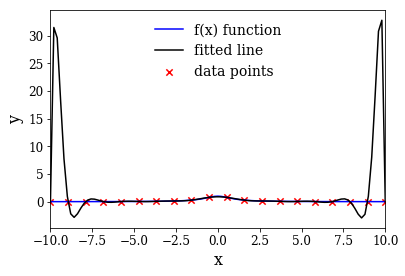

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#calcuate the coefficients for polynomial regression
#m is the degree of the polynomial.
#returns the coefficient array a for the polynomial
def calculate_poly_regression_coef(x, y, m): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)
    
    if(n<(m+1)):
        sys.exit("Polynomial regress is impossible because n is less than m + 1.")

    A = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    
    #loop over each row of matrix A
    for i in range(m+1):
        #loop over each column of current row
        for j in range(m+1):
            if((i+j)==0):
                A[i,j] = n
            else:
                A[i,j] = np.sum(x**(i+j))
                
        if(i==0):
            b[i] = np.sum(y)
        else:
            b[i] = np.inner(x**i, y)
                
     # calculating regression coefficients by solving
    # the linear equation system. Here, we call 
    # the solve function in Numpy's linalg package. 
    a = np.linalg.solve(A, b)

    return a

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

# data points
# note: the length of x and y vectors should be the same
N=20   #number of data points    <----  change this number to see the effect: N = 10,15,20, etc.
x = np.linspace(-10,10,N)
y = 1.0/(1.0+x**2)

# order of the polynomial to be fitted (=N-1)
m = N-1

# calculate the linear regression coefficients 
a = calculate_poly_regression_coef(x, y, m) 

#print("Fitted %d-th order polynomial coefficients = "%m, a)

# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='data points') 

# plotting the original function with more data points
x_plot = np.linspace(-10,10,101)
y_plot = 1.0/(1.0+x_plot**2)
plt.plot(x_plot, y_plot, color = "b", label='f(x) function') 

# x values for predicted y values
x_pred = np.linspace(-10,10,100)

# predicted value using the fitting curve
for i in range(m+1):
    if(i==0):
        y_pred = a[0]*np.ones(np.size(x_pred))
    else:
        y_pred = y_pred + a[i]*x_pred**i

# plotting the regression line 
plt.plot(x_pred, y_pred, color = "k", label='fitted line') 

#plt.text(5,5,r'$r^2$ = %.2f'%r2, fontsize=14)

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#set the limit for the x and y axes
plt.xlim([-10,10])
#plt.ylim([-1,1.2])

plt.legend(loc='upper center',fontsize=14,frameon=False)

#plt.savefig("data_fitting_N20_1.png",dpi=300, bbox_inches='tight', pad_inches=0)

plt.show() 